
Let's first import necessary libraries


In [1]:
# Imported for proper rendering of latex in colab.
from IPython.display import display, Math, Latex
import numpy as np

# Import for generating plots
import matplotlib.pyplot as plt
import seaborn as sns
%matplotlib inline

### N1: Traning Data

##### a. Quick recap
1. Traning data contains features and label that is real number.
2. Model or inference: **y=Xw**

##### b. Objective
The objective of this notebook is to : 
* Demonstrate training data and model components of linear regression model.
* Demonstrate how simple it is to implement ML components and algorithms.


In [2]:
# Create a dataset of 100 examples with a single feature and a label.
# For this construction, we use the following three parameters:

w1 = 5
w0 = 6
n = 100
x = 10*np.random.rand(n,)

In [3]:
X = 10*np.random.rand(100) 

# Obtain y = 5 + 6*x + noise . 
# Noise is randomly sampled.
y = w0 + w1 *X + np.random.rand(n,)

Examining the shapes of training data for sanity check

In [4]:
print('Shape of the training data feature matrix:', X.shape)
print('Shape of the label vector:', y.shape)

Shape of the training data feature matrix: (100,)
Shape of the label vector: (100,)


Dividing the data into training and test set. Set aside 20% of the examples for testing purpose.

In [5]:
from sklearn.model_selection import train_test_split
X_train, X_test, y_train, y_test = train_test_split(X,y,test_size=0.2, random_state=42)

Checking to make sure the sizes of feature and labels set are identical both in training and test sets:

In [6]:
print("Shape of training feature matrix:", X_train.shape)
print("Shape of training feature matrix:", y_train.shape)

Shape of training feature matrix: (80,)
Shape of training feature matrix: (80,)


In [7]:
print('Shape of test feature matrix:', X_test.shape)
print('Shape of test feature matrix:', y_test.shape)

Shape of test feature matrix: (20,)
Shape of test feature matrix: (20,)


Visualizing the training set

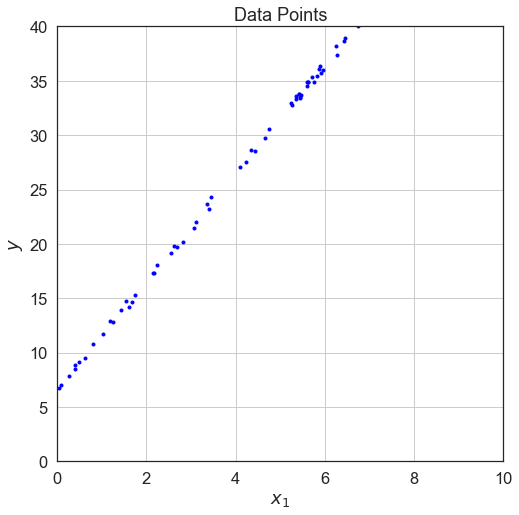

In [8]:
plt.figure(figsize=(8,8))
sns.set_style("white")
sns.set_context("notebook",font_scale=1.5, rc={"lines.linewidth":2.5})

plt.plot(X_train,y_train, "b.")
plt.title("Data Points")
plt.grid(True)
plt.xlabel("$x_1$",fontsize=18)
plt.ylabel("$y$",fontsize=18)
plt.axis([0,10,0,40])
plt.show()

We have a training set consisting a single feature so we will fit a simple linear regression model with one feature. It's form is $y=w_0 + w_1 x_1$.

Also adding a special dummy feature $x_0$ and set it to 1.

In [9]:
def add_dummy_feature(X):
    ''' Adds a dummy feature to the dataset.

    Args:
        x: Training dataset
    Returns:
        Training dataset with an addition of dummy feature.
    '''

    # np.ones(x.shape[0]) create a vector of 1's having the same number of rows as number of samples in dataset.

    return np.column_stack((np.ones(X.shape[0]) ,X))

Let's write a test case to test this function:

For that let's take two examples and three features. The first example is a feature vector :

\begin{align}
X_{3 \times 1} ^{(1)} = \begin{bmatrix} 
3\\2\\5\\ \end{bmatrix} 
\end{align}

and the second example is:
\begin{align} 
\textbf X_{3\times 1} ^{(2)} = \begin{bmatrix} 9\\4\\7 \end{bmatrix} 
\end{align} 

And recall that a feature matrix $\textbf X$ has shape $(n,m)$ corresponding to features of all examples before adding the dummy feature $x_0$.

\begin{align}
X_{n\times m}  = \begin{bmatrix} 
-(\textbf x^{(1)})^{T} -\\-(\textbf x^{(2)})^{T} -\\ \vdots\\-(\textbf x^{(n)})^{T} -\\ \end{bmatrix} 
\end{align}

In our current example, this becomes:
\begin{align}
X_{2\times 3}  = \begin{bmatrix} 
-(\textbf x^{(1)})^{T} -\\-(\textbf x^{(2)})^{T} - \end{bmatrix} 
\end{align}


The corresponding feature matrix $\textbf X $ appears as follows:
\begin{align}
X_{2\times 3}  = \begin{bmatrix} 
3 &2&5\\
9&4&7 \end{bmatrix} 
\end{align}

Here the feature vectors are transposed and represented as rows:
* The first row corresponds to the first exam $\textbf (x^{(1)})^{T}$
and 

* The second row corresponds to the second example $(x^{(2)})^{T}$

Once we add the dummy feature, the resulting matrix becomes:

In [10]:
import unittest

class TestAddDummyFeature(unittest.TestCase):
    def test_add_dummy_feature(self):
        ''' Test case function for add_dummy_feature'''

        train_matrix =np.array([[3,2,5],[9,4,7]])
        train_matrix_with_dummy_feature = add_dummy_feature(train_matrix)

        # test the shape
        self.assertEqual(train_matrix_with_dummy_feature.shape,(2,4))

        # add contents
        np.testing.assert_array_equal(
            train_matrix_with_dummy_feature,
            np.array([[1,3,2,5],[1,9,4,7]])
        )

unittest.main(argv=[''],defaultTest='TestAddDummyFeature',verbosity=3,exit=False)

test_add_dummy_feature (__main__.TestAddDummyFeature)
Test case function for add_dummy_feature ... ok

----------------------------------------------------------------------
Ran 1 test in 0.002s

OK


In [11]:
add_dummy_feature(np.array([[3,2,5],[9,4,7]]))

array([[1., 3., 2., 5.],
       [1., 9., 4., 7.]])

Now preprocessing the training set to add the dummy feature.

In [12]:
print('Before adding the dummy feature:\n', X_train[:5])
print()

X_train_with_dummy_feature = add_dummy_feature(X_train)
print("After adding dummy feature:\n",X_train_with_dummy_feature[:5])

Before adding the dummy feature:
 [4.33751855 0.2660726  4.08943612 5.61999499 5.41732977]

After adding dummy feature:
 [[1.         4.33751855]
 [1.         0.2660726 ]
 [1.         4.08943612]
 [1.         5.61999499]
 [1.         5.41732977]]
